# Comparing ROC vs AUC

Adapted from [Datascienceblog](https://www.datascienceblog.net/post/machine-learning/interpreting-roc-curves-auc/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc
sns.set()

In [2]:
def plot_curves(y1: np.ndarray, y2: np.ndarray, yhat1: np.ndarray, yhat2: np.ndarray) -> None:
    ''' Plot histogram of data, ROC and PR curves
    '''
    
    def roc_analysis(y: np.ndarray, yhat: np.ndarray) -> list:
        fpr, tpr, thresholds = roc_curve(y, yhat)
        auc_roc = auc(fpr, tpr)        
        return [fpr, tpr, thresholds,
                "False Postitive Rate", "True Positive Rate", "ROC",
                ('AUC(ROC): %.3f' % auc_roc)]

    def prc_analysis(y: np.ndarray, yhat: np.ndarray) -> list:
        precision, recall, thresholds = precision_recall_curve(y, yhat)
        auc_prc = auc(recall, precision)
        return [recall, precision, thresholds,
            "Recall", "Precision", "PR",
            ('AUC(PRC): %.3f' % auc_prc)]
    
    def plot_curve(param: list, axs: AxesSubplot) -> None:
        axs.plot(param[0], param[1], label=param[5])
        axs.title.set_text(param[5] + "-curve,    " + param[6])
        axs.set_xlabel(param[3])
        axs.set_ylabel(param[4])
        #axs.legend()
        axs.set_aspect(1.0/axs.get_data_ratio(), adjustable='box')
        #axs.set_aspect("equal", adjustable='box')
    
    fig, axs = plt.subplots(1, 3, sharey=False, sharex=False, figsize=(15,15))
    # Plot Histogram
    sns.distplot(yhat1, kde=False, label="Class1", ax=axs[0])
    sns.distplot(yhat2, kde=False, label="Class2", ax=axs[0])
    axs[0].title.set_text("Score Distribution")
    axs[0].set_xlabel("Prediction")
    axs[0].set_ylabel("Frequency")
    axs[0].legend()
    axs[0].set_aspect(1.0/axs[0].get_data_ratio(), adjustable='box')
       
    # Plot curves
    y = np.hstack([y1, y2])
    yhat = np.hstack([yhat1, yhat2])
    # ROC analysis
    roc = roc_analysis(y, yhat)
    plot_curve(roc, axs[1])
    # PRC analysis
    prc = prc_analysis(y, yhat)
    plot_curve(prc, axs[2])

In [3]:
def generate_data_normal(mu: list, sigma: list, size: list) -> np.ndarray:
    yhat1 = np.random.normal(loc=mu[0], scale=sigma[0], size=size[0])
    yhat2 = np.random.normal(loc=mu[1], scale=sigma[1], size=size[1])
    return yhat1, yhat2

In [4]:
# Create binary labels
random.seed(12345)
size = [70,30]
y1, y2 = np.repeat(0,size[0]), np.repeat(1,size[1])

## AUC for a perfect classifier

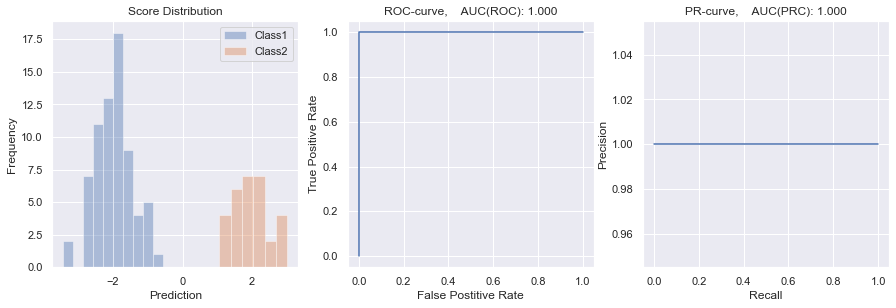

In [5]:
# Create data
mu, sigma = [-2,2], [0.5, 0.5]
yhat1, yhat2 = generate_data_normal(mu, sigma, size)
# Plot
plot_curves(y1,y2,yhat1,yhat2)

## AUC of a good classifier

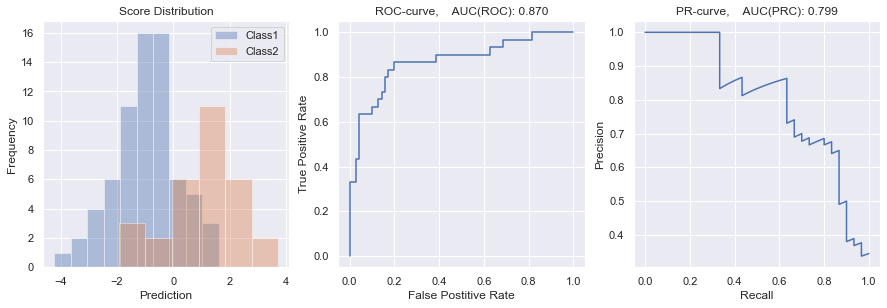

In [6]:
# Create data
mu, sigma = [-1,1], [1, 1.25]
yhat1, yhat2 = generate_data_normal(mu, sigma, size)
# Plot
plot_curves(y1,y2,yhat1,yhat2)

## AUC for a bad classifier

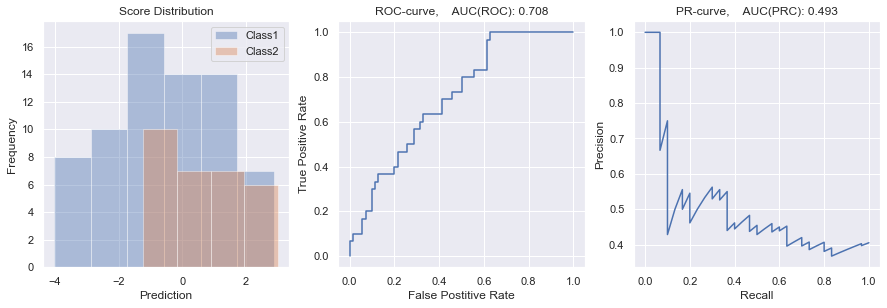

In [7]:
# Create data
mu, sigma = [-0.5,0.5], [1.75, 1.25]
yhat1, yhat2 = generate_data_normal(mu, sigma, size)
# Plot
plot_curves(y1,y2,yhat1,yhat2)

## AUC for a random classifier

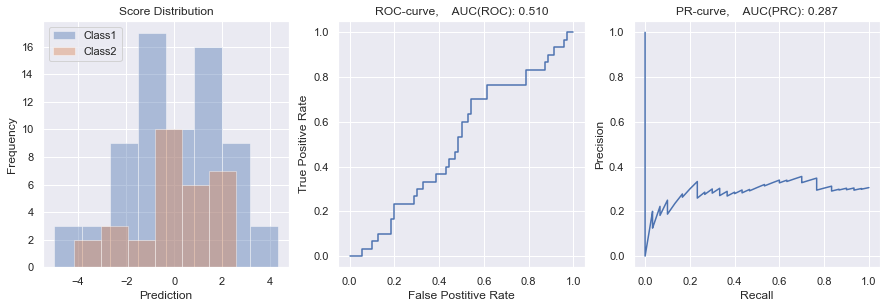

In [8]:
# Create data
mu, sigma = [0,0], [2, 2]
yhat1, yhat2 = generate_data_normal(mu, sigma, size)
# Plot
plot_curves(y1,y2,yhat1,yhat2)

## AUC for a classifier that performs worse than random

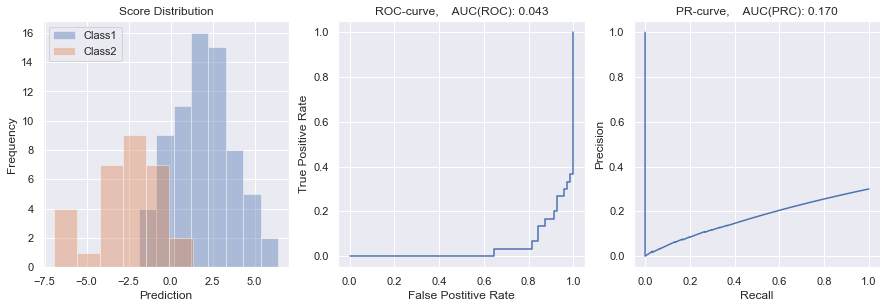

In [9]:
# Create data
mu, sigma = [2,-2], [2, 2]
yhat1, yhat2 = generate_data_normal(mu, sigma, size)
# Plot
plot_curves(y1,y2,yhat1,yhat2)

In [10]:
sns.set()
def plot_scores_auc(y1: np.ndarray, y2: np.ndarray, yhat1: np.ndarray, yhat2: np.ndarray, curve: str="roc") -> None:
    ''' Plot histogram of data and ROC or PR curves
    '''
    fig, axs = plt.subplots(1,2, sharey=False, sharex=False, figsize=(10,10))

    # Histogram plots
    sns.distplot(yhat1, kde=False, label="Class1", ax=axs[0])
    sns.distplot(yhat2, kde=False, label="Class2", ax=axs[0])
    axs[0].title.set_text("Score Distribution")
    axs[0].set_xlabel("Prediction")
    axs[0].set_ylabel("Frequency")
    axs[0].legend()
    axs[0].set_aspect(1.0/axs[0].get_data_ratio(), adjustable='box')
    
    if curve in ("roc", "ROC"):
        y = np.hstack([y1, y2])
        yhat = np.hstack([yhat1, yhat2])
        fpr, tpr, thresholds = roc_curve(y, yhat)
        auc_roc = auc(fpr, tpr)
        x_arg, y_arg = fpr, tpr
        x_lab, y_lab, legend = "False Postitive Rate", "True Positive Rate", "ROC"
        curve_auc = ('AUC(ROC): %.3f' % auc_roc)
        #print('AUC(ROC): %.3f' % auc_roc)
    elif curve in ("prc", "PRC", "PR"):
        y = np.hstack([y1, y2])
        yhat = np.hstack([yhat1, yhat2])
        precision, recall, thresholds = precision_recall_curve(y, yhat)
        auc_prc = auc(recall, precision)
        x_arg, y_arg = recall, precision
        x_lab, y_lab, legend = "Recall", "Precision", "PR"
        curve_auc = ('AUC(PRC): %.3f' % auc_prc)
        #print('AUC(PRC): %.3f' % auc_prc)
    else:
        raise Exception("Curve type " + curve + " is invalid!")
    
    # Plot curve
    plt.plot(x_arg, y_arg, label=legend)
    axs[1].title.set_text(legend + "-curve,    " + curve_auc)
    axs[1].set_xlabel(x_lab)
    axs[1].set_ylabel(y_lab)
    axs[1].legend()
    #axs[1].set_aspect("equal", adjustable='box')
    axs[1].set_aspect(1.0/axs[1].get_data_ratio(), adjustable='box')
    plt.show()

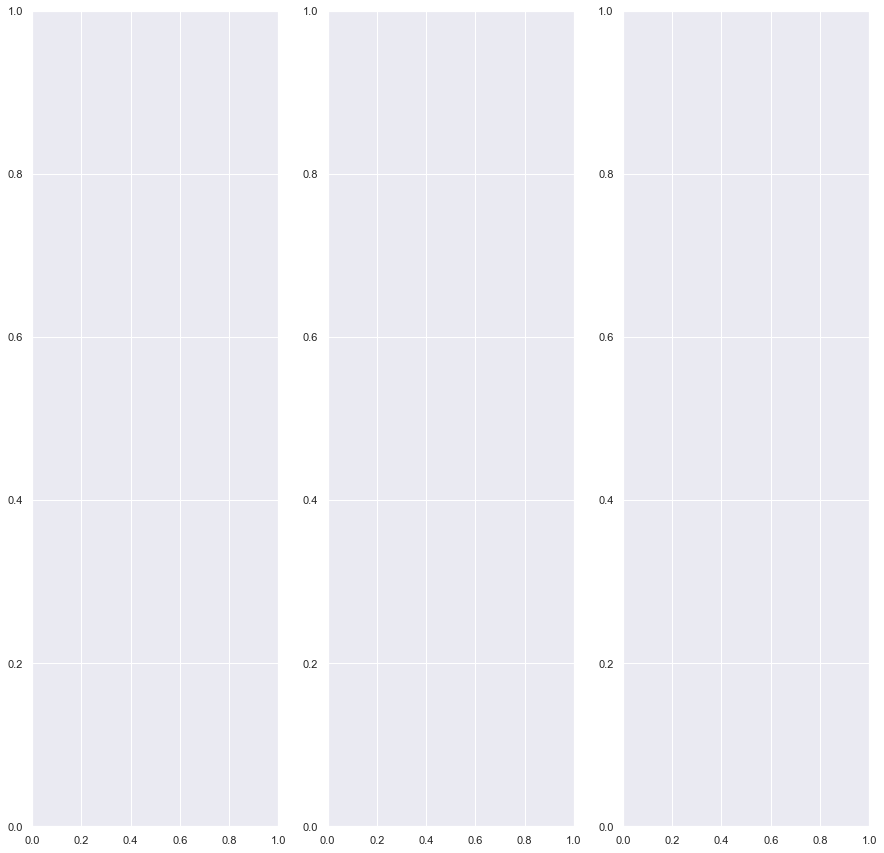

In [12]:
fig, axs = plt.subplots(1,3, sharey=False, sharex=False, figsize=(15,15))

In [14]:
axs[1]